# Catalogue paper for the second half of O3

- GWTC-3: Compact Binary Coalescences Observed by LIGO and Virgo During the Second Part of the Third Observing Run
- Phys. Rev. X; 13(4):041039; 2023
- DOI: https://doi.org/10.1103/PhysRevX.13.041039
- https://arxiv.org/pdf/2111.03606.pdf
- Data behind the figures: https://zenodo.org/records/7997424
- Parameter estimation data release: https://zenodo.org/records/8177023


> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.

## Figure 7

In [1]:
from IPython.display import IFrame
IFrame('screenshot_fig7_GWTC3.pdf', width=800, height=1200)

## Load libs

In [7]:
!pip install h5py

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
pip install seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [5]:
import h5py
from os import listdir
from os.path import join
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [6]:
# GW200224_222234
file_name = "IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_nocosmo.h5"


In [7]:
# 打开 HDF5 格式的文件，"r" 表示只读模式
with h5py.File(file_name, "r") as f:
    # 输出文件中的数据集
    print("H5 data sets:")
    print(list(f))
    # 输出指定数据集下的所有键
    print(list(f['C01:Mixed'].keys()))
    # 输出指定数据集下的 'posterior_samples' 键的内容
    print(f['C01:Mixed']['posterior_samples'])
    # 输出指定数据集下的 'priors' 数据集下的 'samples' 键的内容
    print(f['C01:IMRPhenomXPHM']['priors']['samples'])
    # 将 'priors' 数据集下的 'samples' 转换为 Pandas DataFrame
    priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples']))
    # 将 'posterior_samples' 数据集内容转换为 Pandas DataFrame
    posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']
['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
<HDF5 dataset "posterior_samples": shape (27066,), type "|V480">
<HDF5 group "/C01:IMRPhenomXPHM/priors/samples" (141 members)>


- 查看数据

In [8]:
priors.shape, posterior_samples.shape

((5000, 141), (27066, 60))

In [9]:
posterior_samples.head()

,final_spin,spin_2y,final_mass_source,spin_1y,cos_tilt_2,mass_1_source,viewing_angle,spin_2x,inverted_mass_ratio,phi_2,...,mass_1,tilt_1_infinity_only_prec_avg,tilt_2_infinity_only_prec_avg,spin_1z_infinity_only_prec_avg,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,psi_wrapped
0,0.762918,-0.041085,69.109977,0.014177,0.058832,40.733833,1.060127,-0.692939,1.269768,3.200814,...,52.771531,0.305515,1.930207,0.412034,-0.244574,0.122750,0.495520,0.953692,-0.351722,3.028532
1,0.733357,0.023274,65.985930,0.356863,-0.395370,37.751510,0.342163,-0.836304,1.196297,3.113770,...,50.609139,0.739061,2.164322,0.371285,-0.509422,-0.029711,0.615253,0.739102,-0.559287,2.573610
2,0.739718,-0.093947,69.038893,0.409447,0.626205,38.959810,0.711928,-0.238127,1.149041,3.517372,...,51.059068,1.233780,1.027831,0.145961,0.169643,0.156981,0.416576,0.330673,0.516677,0.551321
3,0.765359,0.298139,66.657875,0.324863,-0.806156,36.032509,0.583759,0.229303,1.048945,0.915173,...,49.267700,1.168438,1.730158,0.356747,-0.100871,0.133404,0.838270,0.391589,-0.158688,0.503517
4,0.753689,0.321498,65.900583,0.478889,-0.209761,38.926599,0.628362,0.102761,1.276905,1.261429,...,52.668939,0.647877,2.631644,0.440828,-0.301281,0.114899,0.333645,0.797367,-0.872769,0.641404


In [10]:
priors.head()

,a_1,a_2,azimuth,beta,chi_eff,chi_p,chi_p_2spin,chirp_mass,chirp_mass_source,comoving_distance,...,spin_2z,symmetric_mass_ratio,theta_jn,tilt_1,tilt_2,time_jitter,total_mass,total_mass_source,viewing_angle,zenith
0,0.460128,0.444882,2.145117,0.484597,-0.017186,0.454140,0.464483,44.889978,21.884712,3521.420488,...,0.184631,0.171393,0.929696,1.732292,1.142840,-0.000809,129.346110,63.058671,0.929696,1.561957
1,0.762177,0.548389,1.164424,0.411250,-0.024444,0.713720,0.733618,44.930641,20.028612,3960.727207,...,0.409501,0.230105,1.025151,1.929299,0.727658,0.000854,108.489419,48.361039,1.025151,2.240795
2,0.866523,0.216486,2.240282,0.351323,0.025298,0.866394,0.855379,44.157503,20.270804,3817.563846,...,0.040096,0.242119,2.381255,1.553527,1.384508,-0.000362,103.415943,47.473797,0.760338,1.618132
3,0.922355,0.158073,5.371943,0.940030,0.397972,0.821131,0.821225,50.214304,21.312379,4197.393685,...,0.039362,0.054737,1.485624,1.097904,1.319135,0.000021,286.984862,121.804539,1.485624,0.802571
4,0.100252,0.662175,5.333537,0.063933,0.138574,0.087998,0.057907,35.246097,24.352617,1765.691667,...,0.487807,0.153953,1.383336,0.970762,0.742657,-0.000853,108.312447,74.836416,1.383336,0.980989


## Plot for an event

- 绘制 `chirp_mass_source` 特征的后验分布 vs 先验分布

In [11]:
data = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data.chirp_mass_source = posterior_samples.chirp_mass_source
data.violin = 'upper'
data.event = 'GW200224_222234'

data_prior = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data_prior.chirp_mass_source = priors.chirp_mass_source
data_prior.violin = 'bottom'
data_prior.event = 'GW200224_222234'
data = pd.concat([data, data_prior])

In [89]:
data

,event,violin,chirp_mass_source
0,GW200224_222234,upper,31.424565
1,GW200224_222234,upper,30.023442
2,GW200224_222234,upper,31.625226
3,GW200224_222234,upper,30.625790
4,GW200224_222234,upper,29.944292
...,...,...,...
4995,GW200224_222234,bottom,16.796509
4996,GW200224_222234,bottom,23.129754
4997,GW200224_222234,bottom,30.269935
4998,GW200224_222234,bottom,14.921696


<Axes: xlabel='chirp_mass_source', ylabel='event'>

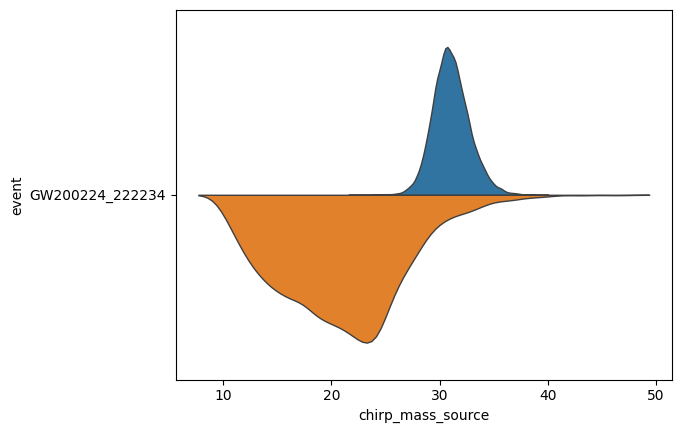

In [12]:
sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               linewidth=1
              )

In [13]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW200224_222234 bottom               5000
                upper               27066

## Plot for multiple events

- 对所有 events 的 `chirp_mass_source` 特征读取其后验分布 vs 先验分布

In [ ]:
address

In [ ]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

df_list = []
for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

        
    df = pd.DataFrame({
        'chirp_mass_source': posterior_samples['chirp_mass_source'],
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        'chirp_mass_source': priors['chirp_mass_source'],
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [116]:
data

,chirp_mass_source,violin,event
0,8.929873,upper,GW191103_012549
1,8.074338,upper,GW191103_012549
2,8.273513,upper,GW191103_012549
3,8.369736,upper,GW191103_012549
4,8.441250,upper,GW191103_012549
...,...,...,...
4995,38.664199,bottom,GW200322_091133
4996,36.743287,bottom,GW200322_091133
4997,6.229935,bottom,GW200322_091133
4998,29.972274,bottom,GW200322_091133


In [117]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW191103_012549 bottom               5000
                upper                9859
GW191105_143521 bottom               5000
                upper               16861
GW191109_010717 bottom               5000
...                                   ...
GW200311_115853 upper               20276
GW200316_215756 bottom               5000
                upper              129267
GW200322_091133 bottom               5000
                upper                  69

[72 rows x 1 columns]

<Axes: xlabel='chirp_mass_source', ylabel='event'>

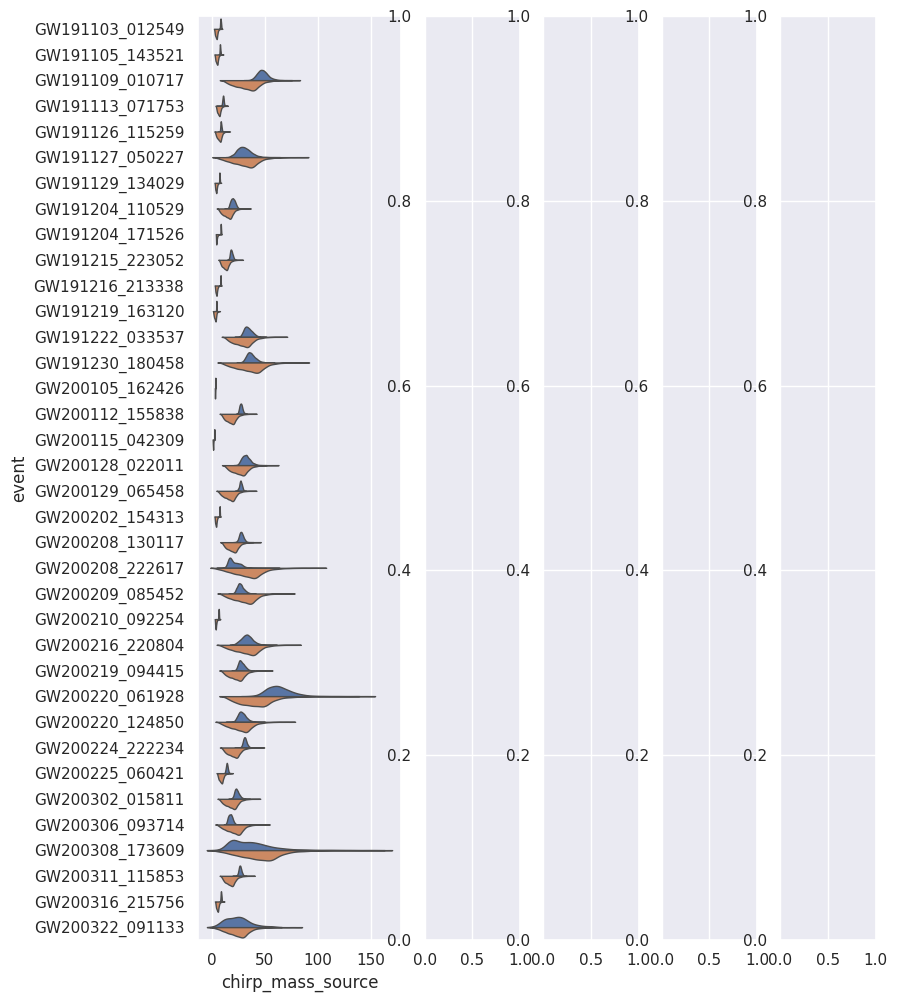

In [118]:
fig,ax = plt.subplots(1, 5, figsize=(8.75,12), sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               ax=ax[0],
               linewidth=1
              )

- 修改一下坐标轴的标度等

In [103]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

        
    df = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(posterior_samples['chirp_mass_source']),
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(priors['chirp_mass_source']),
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

[Text(0.3010299956639812, 1, '$2$'),
 Text(0.6989700043360189, 1, '$5$'),
 Text(1.0, 1, '$10$'),
 Text(1.3010299956639813, 1, '$20$'),
 Text(1.6989700043360187, 1, '$50$'),
 Text(2.0, 1, '$100$')]

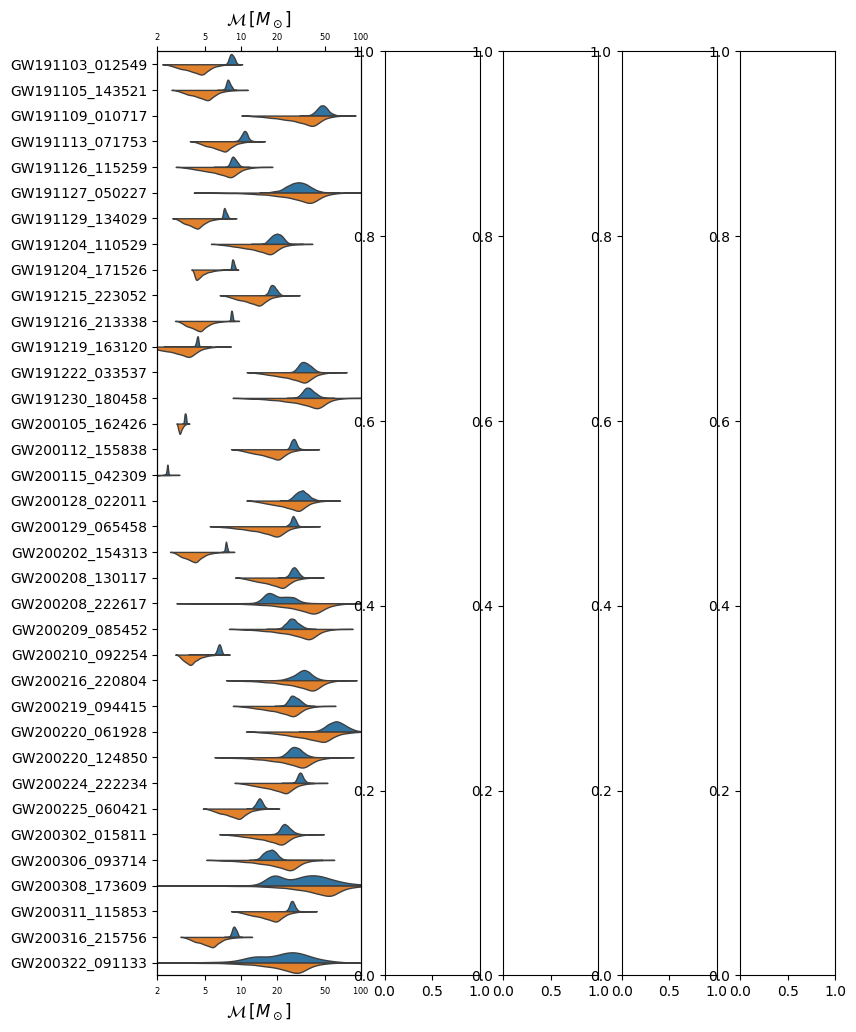

In [105]:
fig,ax = plt.subplots(1, 5,figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

# 为其他 params 维度的循环做准备
vi=0
var='chirp_mass_source'
xlim = [2,100]
tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
}

sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                         orient="h",density_norm='width',inner=None,split=True,legend=False,
                         ax=ax[vi],
                         linewidth=1,
                        )

# set x labels
ax[vi].set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)
# set top x label
ax_copy = ax[vi].twiny()
ax_copy.set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)

# 设定坐标的边界
ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
# 删掉 `events`
ax[vi].set_ylabel('')

# set tick labels
ax[vi].set_xticks(np.log10(tick_map[var]))
ax_copy.set_xticks(np.log10(tick_map[var]))
sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

## Plot for multiple params

In [122]:
address = '/home/GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

# 指定五个参数维度
vars = ['chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']
df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
        
    df = pd.DataFrame({
        **{  # 对 chirp_mass_source, mass_ratio 以及 luminosity_distance 特征在scale上进行处理
            var: np.log10(posterior_samples[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else posterior_samples[var] for var in vars
        },
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        **{
            var: np.log10(priors[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else priors[var] for var in vars
        },
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [123]:
data

,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance,violin,event
0,0.950845,-0.013426,0.124681,0.398897,-0.288171,upper,GW191103_012549
1,0.907107,-0.028997,0.210005,0.232888,0.091748,upper,GW191103_012549
2,0.917690,-0.082065,0.191831,0.381942,0.032501,upper,GW191103_012549
3,0.922712,-0.353322,0.285288,0.516188,0.004128,upper,GW191103_012549
4,0.926407,-0.233709,0.228022,0.338341,-0.055944,upper,GW191103_012549
...,...,...,...,...,...,...,...
4995,1.587309,-0.978478,0.808248,0.074668,1.194721,bottom,GW200322_091133
4996,1.565178,-0.550964,0.195930,0.293281,1.211398,bottom,GW200322_091133
4997,0.794484,-0.258141,0.201115,0.305499,1.227825,bottom,GW200322_091133
4998,1.476720,-0.808768,-0.019374,0.188534,1.387833,bottom,GW200322_091133


In [124]:
data.groupby(['event', 'violin']).count()

chirp_mass_source  mass_ratio  chi_eff   chi_p  \
event           violin                                                   
GW191103_012549 bottom               5000        5000     5000    5000   
                upper                9859        9859     9859    9859   
GW191105_143521 bottom               5000        5000     5000    5000   
                upper               16861       16861    16861   16861   
GW191109_010717 bottom               5000        5000     5000    5000   
...                                   ...         ...      ...     ...   
GW200311_115853 upper               20276       20276    20276   20276   
GW200316_215756 bottom               5000        5000     5000    5000   
                upper              129267      129267   129267  129267   
GW200322_091133 bottom               5000        5000     5000    5000   
                upper                  69          69       69      69   

                        luminosity_distance  
event           violin                       
GW191103_012549 bottom                 5000  
                upper                  9859  
GW191105_143521 bottom                 5000  
                upper                 16861  
GW191109_010717 bottom                 5000  
...                                     ...  
GW200311_115853 upper                 20276  
GW200316_215756 bottom                 5000  
                upper                129267  
GW200322_091133 bottom                 5000  
                upper                    69  

[72 rows x 5 columns]

> Bug: GW200322_091133 posterior?

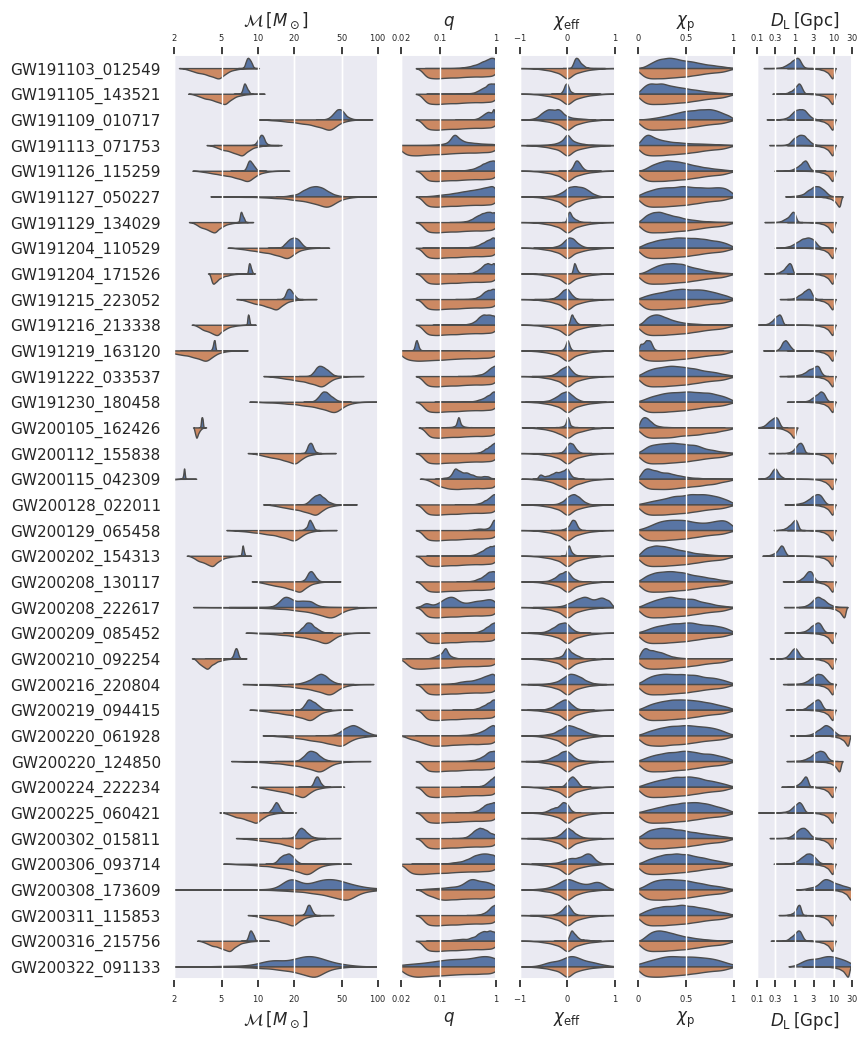

In [125]:
# 定义变量和参数
fig, ax = plt.subplots(1, len(vars), figsize=(8.75, 12), sharey=False,
                      gridspec_kw={'wspace': 0.2, 'width_ratios': [1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2, 100, 0.02, 1, -1, 1, 0, 1, 0.1, 30]

tick_map = {
    'chirp_mass_source': [2, 5, 10, 20, 50, 100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1, 0, 1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1, 0.3, 1, 3, 10, 30]
}

column_name2tex_name = {
    'chirp_mass_source': r'\mathcal{{M}}\:[M_\odot]',
    'mass_ratio': r'q',
    'chi_eff': r'\chi_{{\rm eff}}',
    'chi_p': r'\chi_{{\rm p}}',
    'luminosity_distance': r'D_{\rm L}\:[{\rm Gpc}]',
}

# 遍历每个变量
for vi, var in enumerate(vars):
    # 绘制小提琴图
    sns_axi = sns.violinplot(x=var, y='event', data=data, hue='violin',
                             orient="h", density_norm='width', inner=None, split=True, legend=False,
                             ax=ax[vi],
                             linewidth=1
                             )

    # 设置 x 轴标签
    ax[vi].set_xlabel(r'$' + column_name2tex_name[var] + r'$', fontsize=12)
    # 设置顶部 x 轴标签
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$' + column_name2tex_name[var] + r'$', fontsize=12)

    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2 * vi:2 * vi + 2]))
        ax_copy.set_xlim(np.log10(xlim[2 * vi:2 * vi + 2]))
    else:
        ax[vi].set_xlim(xlim[2 * vi:2 * vi + 2])
        ax_copy.set_xlim(xlim[2 * vi:2 * vi + 2])

    # 删掉 `events`
    ax[vi].set_ylabel('')
    if vi:
        ax[vi].yaxis.set_visible(False)

    # 设置刻度标签
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)


## Stylize your plot

In [112]:
sns.color_palette("Spectral_r", 10).as_hex()

['#3682ba',
 '#5cb7aa',
 '#97d5a4',
 '#d1ed9c',
 '#f4faad',
 '#fff1a8',
 '#fece7c',
 '#fa9b58',
 '#ee6445',
 '#d0384e']

In [113]:
sns.set()

CPU times: user 33.2 s, sys: 1min 24s, total: 1min 57s
Wall time: 20.3 s


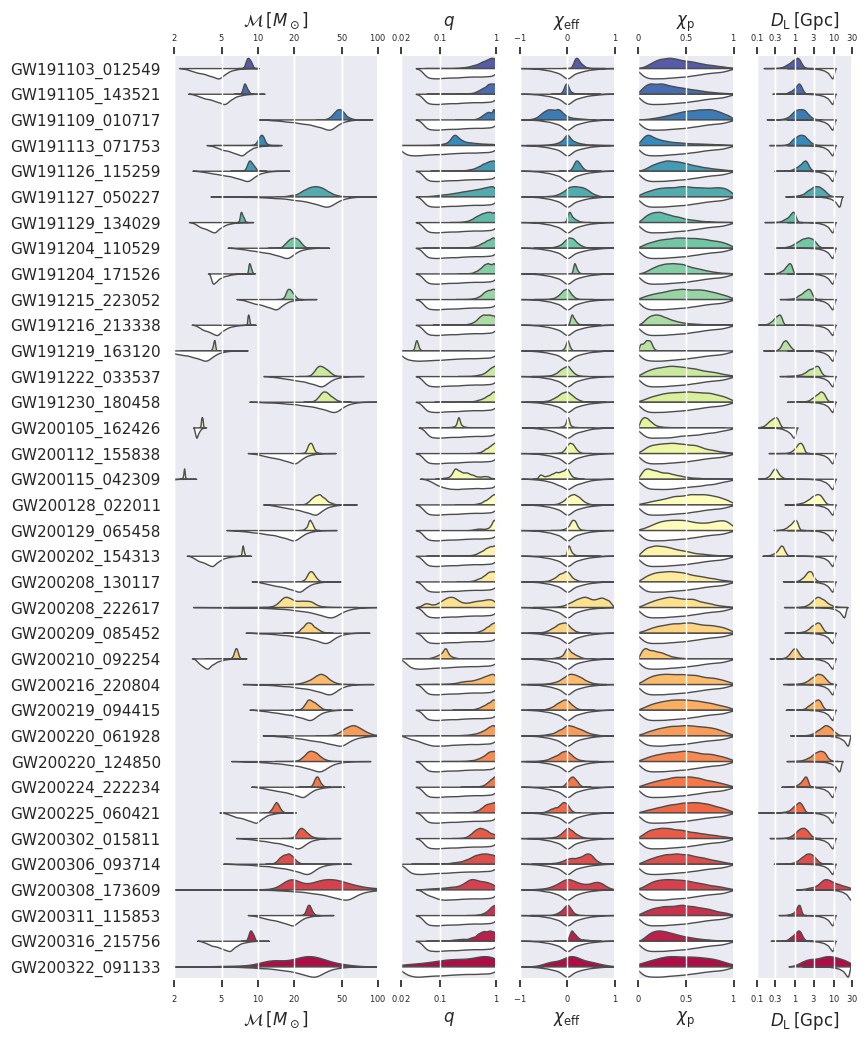

In [114]:
%%time
fig,ax = plt.subplots(1, len(vars), figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
        }

# 获取颜色参数
colors = sns.color_palette("Spectral_r", len(event_file)).as_hex()

for vi, var in enumerate(vars):
    sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                             orient="h",density_norm='width',inner=None,split=True,legend=False,
                             ax=ax[vi],#palette=colors,
                             linewidth=1
                            )

    # loop over violins to add hatching and shading where required
    violin_pairs = []
    for v, violin_half in enumerate(sns_axi.get_children()):
        if v % 2 == 0: # Upper violin
            violin_pairs.append([])
        violin_pairs[-1].append(violin_half)
    for pair, (ev, _), col in zip(violin_pairs, event_file, colors): # 给每个 event 指定颜色
        # print(ev)
        pair[0].set_facecolor(col)        # 为 posterior 指定颜色
        pair[1].set_facecolor('#FFFFFF')  # 为 prior 白色

    # set x labels
    ax[vi].set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    # set top x label
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
        ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
    else:
        ax[vi].set_xlim(xlim[2*vi:2*vi+2])
        
        
        ax_copy.set_xlim(xlim[2*vi:2*vi+2])

    # 删掉 `events`        
    ax[vi].set_ylabel('')
    if vi:    
        ax[vi].yaxis.set_visible(False)

    # set tick labels
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.

In [21]:
#对比一下
from IPython.display import IFrame
IFrame('screenshot_fig7_GWTC3.pdf', width=800, height=1200)